# Imports 

In [6]:
from gsdmm import MovieGroupProcess
print("GSDMM is installed and working ")

GSDMM is installed and working 


In [4]:
import sys
!{sys.executable} -m pip install gensim

     ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.4 MB 1.3 MB/s eta 0:00:20
     ---------------------------------------- 0.1/24.4 MB 1.3 MB/s eta 0:00:19
     ---------------------------------------- 0.2/24.4 MB 1.4 MB/s eta 0:00:18
     ---------------------------------------- 0.3/24.4 MB 1.6 MB/s eta 0:00:15
      --------------------------------------- 0.5/24.4 MB 2.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/24.4 MB 2.4 MB/s eta 0:00:10
     - -------------------------------------- 0.8/24.4 MB 2.6 MB/s eta 0:00:10
     - -------------------------------------- 1.0/24.4 MB 2.8 MB/s eta 0:00:09
     - -------------------------------------- 1.2/24.4 MB 2.9 MB/s eta 0:00:09
     -- ------------------------------------- 1.4/24.4 MB 3.1 MB/s eta 0:00:08
     -- ------------------------------------- 1.5/24.4 MB 3.2 MB/s eta 0:00:08
     -- ------------------------------------- 1.7/24.4 MB 3


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import gensim
from gensim.utils import simple_preprocess
print("Gensim is installed and working ")

Gensim is installed and working 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import spacy, gensim

# Dataset Loading

In [9]:
data = pd.read_csv(
    r"C:\Users\gasse\OneDrive\Desktop\19 Text Clustering\Corona.csv",
    header=0,
    encoding='cp437'
)

# Reduce size for faster clustering
data = data[::10]

data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative
40,3839,48791,"Fort Worth, Texas",16-03-2020,We're here to provide a safe shopping experien...,Extremely Positive


# Data Inspection

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 41150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       4116 non-null   int64 
 1   ScreenName     4116 non-null   int64 
 2   Location       3265 non-null   object
 3   TweetAt        4116 non-null   object
 4   OriginalTweet  4116 non-null   object
 5   Sentiment      4116 non-null   object
dtypes: int64(2), object(4)
memory usage: 193.1+ KB


In [11]:
data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,4116.000000,4116.000000,3265,4116,4116,4116
unique,NaN,NaN,1967,30,4116,5
top,NaN,NaN,"London, England",20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,52,345,1,1136
mean,24374.000000,69326.000000,NaN,NaN,NaN,NaN
std,11883.311828,11883.311828,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14086.500000,59038.500000,NaN,NaN,NaN,NaN
50%,24374.000000,69326.000000,NaN,NaN,NaN,NaN
75%,34661.500000,79613.500000,NaN,NaN,NaN,NaN


# Feature Engineering

In [12]:
data['CharCount'] = data['OriginalTweet'].apply(len)
data['WordCount'] = data['OriginalTweet'].apply(lambda x: len(x.split()))

special_chars = ';!@#$%^&*'
for ch in special_chars:
    data[ch] = data['OriginalTweet'].apply(lambda x: x.count(ch))

In [13]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CharCount,WordCount,;,!,@,#,$,%,^,&,*
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,8,0,0,3,0,0,0,0,0,0
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral,276,39,0,0,0,4,0,0,0,0,0
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative,251,41,0,0,0,0,0,0,0,0,0
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative,114,23,0,0,0,0,0,0,0,0,0
40,3839,48791,"Fort Worth, Texas",16-03-2020,We're here to provide a safe shopping experien...,Extremely Positive,307,35,0,1,0,7,0,0,0,0,0


# Feature Matrix

In [14]:
X = data[['CharCount','WordCount',';','!','@','#','$','%','^','&','*']]
X.head()

,CharCount,WordCount,;,!,@,#,$,%,^,&,*
0,111,8,0,0,3,0,0,0,0,0,0
10,276,39,0,0,0,4,0,0,0,0,0
20,251,41,0,0,0,0,0,0,0,0,0
30,114,23,0,0,0,0,0,0,0,0,0
40,307,35,0,1,0,7,0,0,0,0,0


# Feature Scaling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-MEANS Clustering

# K = 3

In [16]:
kmeans_3 = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=33,
    n_init=10
)

kmeans_3.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,33
,copy_x,True
,algorithm,'lloyd'


In [17]:
pd.DataFrame(
    kmeans_3.cluster_centers_,
    columns=X.columns
)

,CharCount,WordCount,;,!,@,#,$,%,^,&,*
0,0.892358,0.690062,2.720120,0.191625,0.281582,0.189400,0.156048,0.137018,0.258919,2.722124,0.224365
1,-1.073669,-1.029480,-0.229477,-0.128963,-0.229105,-0.184874,-0.065298,-0.112803,-0.022049,-0.223699,-0.052154
2,0.634771,0.632789,-0.233176,0.063932,0.122157,0.104088,0.023764,0.060382,-0.022049,-0.237584,0.004437


# # Cluster Distribution Visualization

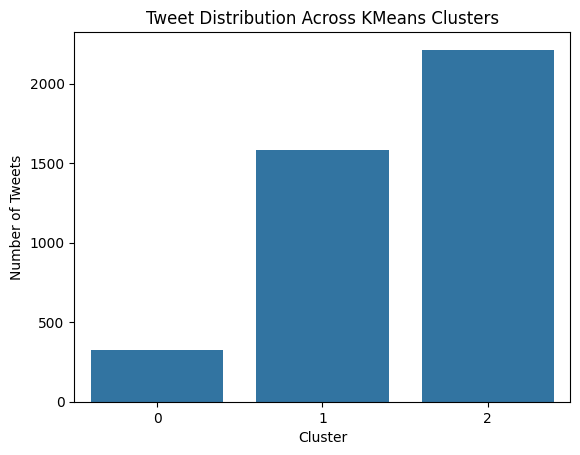

In [21]:
sns.countplot(x=kmeans_3.labels_)
plt.title("Tweet Distribution Across KMeans Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Tweets")
plt.show()

# k = 5

In [18]:
kmeans_5 = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=33,
    n_init=10
)

kmeans_5.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,33
,copy_x,True
,algorithm,'lloyd'


In [19]:
pd.DataFrame(
    kmeans_5.cluster_centers_,
    columns=X.columns
)

,CharCount,WordCount,;,!,@,#,$,%,^,&,*
0,-1.066026,-1.020579,-0.229756,-0.130334,-0.225140,-0.185155,-0.065699,-0.113094,-0.022049,-0.223830,-0.070702
1,0.888264,0.899245,0.739808,-0.284804,0.469168,0.010751,-0.110819,2.029834,45.354162,0.826372,2.355201
2,0.888125,0.688743,2.722807,0.178307,0.291123,0.196718,0.161960,0.129514,-0.022049,2.720309,-0.061420
3,0.639627,0.637801,-0.232778,0.060592,0.123176,0.104602,0.025674,0.059325,-0.022049,-0.237571,-0.067904
4,0.806563,0.561970,0.557808,0.881002,-0.160340,0.187756,-0.110819,0.249693,-0.022049,0.632751,12.525443


# Cluster Distribution Visualization

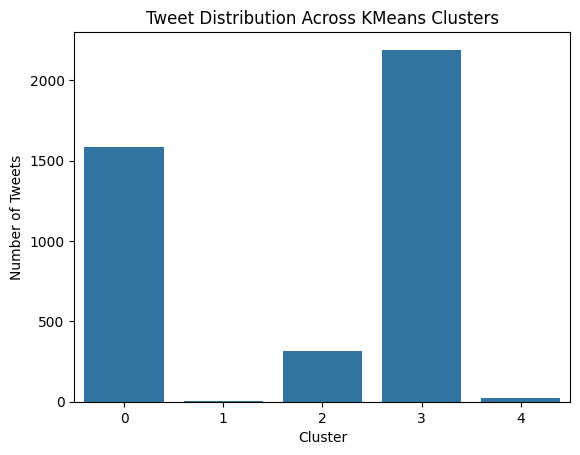

In [20]:
sns.countplot(x=kmeans_5.labels_)
plt.title("Tweet Distribution Across KMeans Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Tweets")
plt.show()

# Elbow Method (SSD)

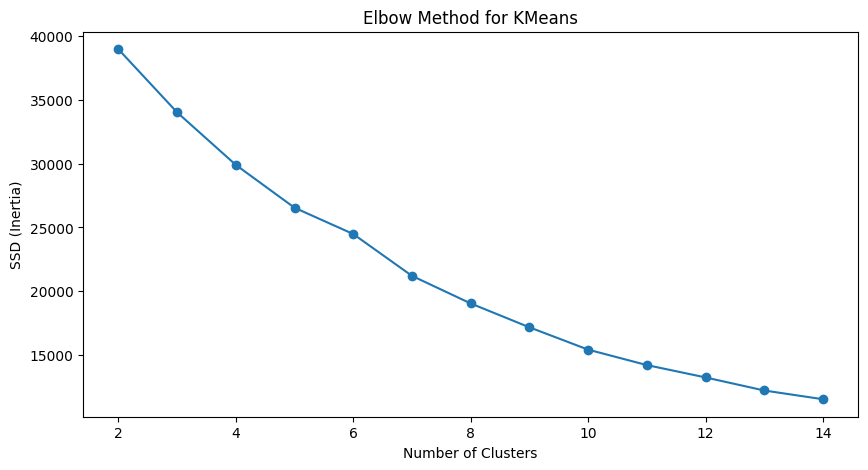

In [22]:
ssd = {}

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=33, n_init=10)
    km.fit(X_scaled)
    ssd[k] = km.inertia_

plt.figure(figsize=(10,5))
plt.plot(ssd.keys(), ssd.values(), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSD (Inertia)")
plt.title("Elbow Method for KMeans")
plt.show()

# GSDMM Clustering

# Text Preprocessing

In [23]:
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

def preprocess(texts):
    return [
        [token.lemma_ for token in nlp(text.lower())
         if token.is_alpha and not token.is_stop]
        for text in texts
    ]

docs = preprocess(data['OriginalTweet'][::10])

# Training GSDMM

# k = 3

In [27]:
K = 3
mgp = MovieGroupProcess(K=K, alpha=0.1, beta=0.1, n_iters=10)

vocab = set(word for doc in docs for word in doc)
mgp.fit(docs, len(vocab))

In stage 0: transferred 222 clusters with 3 clusters populated
In stage 1: transferred 114 clusters with 3 clusters populated
In stage 2: transferred 59 clusters with 3 clusters populated
In stage 3: transferred 55 clusters with 3 clusters populated
In stage 4: transferred 50 clusters with 3 clusters populated
In stage 5: transferred 36 clusters with 3 clusters populated
In stage 6: transferred 36 clusters with 3 clusters populated
In stage 7: transferred 21 clusters with 3 clusters populated
In stage 8: transferred 32 clusters with 3 clusters populated
In stage 9: transferred 34 clusters with 3 clusters populated


[0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,


# GSDMM Cluster Sizes

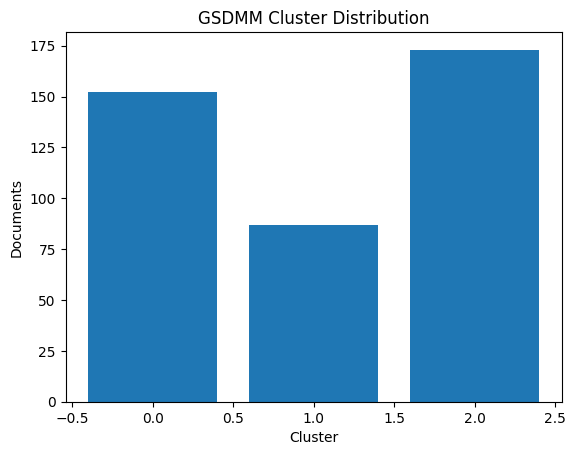

In [28]:
cluster_counts = mgp.cluster_doc_count

plt.bar(range(K), cluster_counts)
plt.xlabel("Cluster")
plt.ylabel("Documents")
plt.title("GSDMM Cluster Distribution")
plt.show()

# Top Words per Cluster

In [29]:
for i in range(K):
    words = sorted(
        mgp.cluster_word_distribution[i].items(),
        key=lambda x: x[1],
        reverse=True
    )[:10]
    print(f"\nCluster {i}:", words)


Cluster 0: [('coronavirus', 57), ('consumer', 52), ('price', 49), ('food', 39), ('demand', 28), ('amp', 25), ('pandemic', 21), ('business', 21), ('online', 19), ('oil', 19)]

Cluster 1: [('coronavirus', 67), ('toiletpaper', 20), ('supermarket', 17), ('price', 16), ('paper', 14), ('toilet', 14), ('food', 13), ('people', 11), ('gt', 10), ('consumer', 8)]

Cluster 2: [('coronavirus', 69), ('store', 61), ('grocery', 47), ('worker', 32), ('supermarket', 32), ('people', 31), ('hand', 25), ('go', 24), ('price', 24), ('food', 23)]


# k = 5

In [24]:
K = 5
mgp = MovieGroupProcess(K=K, alpha=0.1, beta=0.1, n_iters=10)

vocab = set(word for doc in docs for word in doc)
mgp.fit(docs, len(vocab))

In stage 0: transferred 258 clusters with 5 clusters populated
In stage 1: transferred 126 clusters with 5 clusters populated
In stage 2: transferred 91 clusters with 5 clusters populated
In stage 3: transferred 84 clusters with 5 clusters populated
In stage 4: transferred 82 clusters with 5 clusters populated
In stage 5: transferred 53 clusters with 5 clusters populated
In stage 6: transferred 53 clusters with 5 clusters populated
In stage 7: transferred 50 clusters with 5 clusters populated
In stage 8: transferred 47 clusters with 5 clusters populated
In stage 9: transferred 54 clusters with 5 clusters populated


[4,
 1,
 3,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 2,
 1,
 2,
 3,
 1,
 1,
 3,
 0,
 4,
 1,
 3,
 0,
 2,
 0,
 1,
 3,
 1,
 0,
 2,
 2,
 4,
 4,
 1,
 1,
 2,
 2,
 1,
 2,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 4,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 4,
 1,
 4,
 4,
 0,
 4,
 1,
 4,
 1,
 2,
 3,
 4,
 0,
 2,
 0,
 1,
 1,
 0,
 4,
 1,
 4,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 0,
 1,
 2,
 1,
 0,
 2,
 4,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 4,
 4,
 4,
 4,
 1,
 2,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 4,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 2,
 1,
 0,
 3,
 2,
 4,
 0,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 2,
 1,
 3,
 2,
 4,
 2,
 3,
 4,
 3,
 3,
 0,
 2,
 0,
 3,
 2,
 0,
 4,
 2,
 0,
 3,
 0,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 3,
 4,
 2,
 1,
 0,
 1,
 0,
 4,
 4,
 1,
 4,
 0,
 2,
 0,
 4,
 1,
 4,
 4,
 3,
 2,
 4,


# GSDMM Cluster Sizes

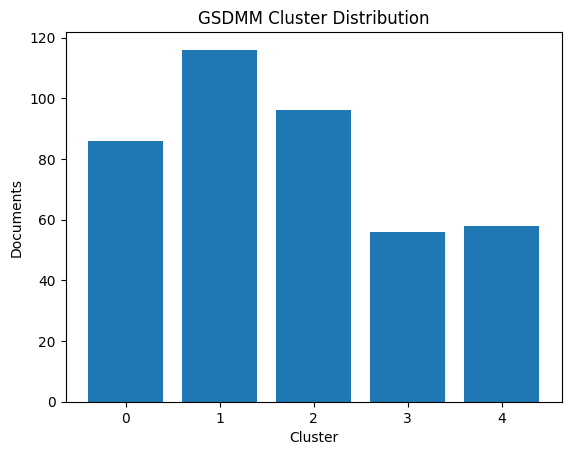

In [25]:
cluster_counts = mgp.cluster_doc_count

plt.bar(range(K), cluster_counts)
plt.xlabel("Cluster")
plt.ylabel("Documents")
plt.title("GSDMM Cluster Distribution")
plt.show()

# Top Words per Cluster

In [26]:
for i in range(K):
    words = sorted(
        mgp.cluster_word_distribution[i].items(),
        key=lambda x: x[1],
        reverse=True
    )[:10]
    print(f"\nCluster {i}:", words)


Cluster 0: [('coronavirus', 39), ('consumer', 22), ('sanitizer', 18), ('price', 18), ('amp', 17), ('hand', 16), ('covid', 12), ('social', 12), ('supermarket', 12), ('food', 10)]

Cluster 1: [('store', 52), ('coronavirus', 42), ('grocery', 41), ('worker', 36), ('supermarket', 30), ('amp', 17), ('shop', 16), ('food', 16), ('people', 16), ('go', 16)]

Cluster 2: [('coronavirus', 52), ('food', 25), ('price', 21), ('consumer', 17), ('people', 17), ('store', 16), ('paper', 16), ('grocery', 15), ('toilet', 15), ('panic', 12)]

Cluster 3: [('consumer', 22), ('coronavirus', 21), ('food', 21), ('demand', 15), ('price', 13), ('amp', 11), ('business', 9), ('supply', 9), ('bank', 8), ('pandemic', 7)]

Cluster 4: [('coronavirus', 39), ('price', 31), ('oil', 19), ('gt', 10), ('fall', 9), ('consumer', 8), ('covid', 8), ('æs', 7), ('online', 6), ('supermarket', 6)]
